# Exploratory data analysis
Having learned how to ingest and inspect your data, you will next explore it visually as well as quantitatively. This process, known as exploratory data analysis (EDA), is a crucial component of any data science project. Pandas has powerful methods that help with statistical and visual EDA. In this chapter, you will learn how and when to apply these techniques.

# 1. Visual exploratory data analysis
## 1.1 pandas line plots
In the previous chapter, you saw that the `.plot()` method will place the Index values on the x-axis by default. In this exercise, you'll practice making line plots with specific columns on the x and y axes.

You will work with a dataset consisting of monthly stock prices in 2015 for AAPL, GOOG, and IBM. The stock prices were obtained from [Yahoo Finance](https://finance.yahoo.com/). Your job is to plot the `'Month'` column on the x-axis and the AAPL and IBM prices on the y-axis using a list of column names.

All necessary modules have been imported for you, and the DataFrame is available in the workspace as `df`. Explore it using methods such as `.head()`, `.info()`, and `.describe()` to see the column names.

### Instructions:
* Create a list of y-axis column names called `y_columns` consisting of `'AAPL'` and `'IBM'`.
* Generate a line plot with `x='Month'` and `y=y_columns` as inputs.
* Give the plot a title of `'Monthly stock prices'`.
* Specify the y-axis label.
* Display the plot.

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Build the DataFrame from data lists
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
AAPL = [117.160004, 128.46000700000002, 124.43, 125.150002, 130.279999, 125.43, 121.300003, 112.760002, 110.300003,
        119.5, 118.300003, 105.260002]
GOOG = [534.5224450000002, 558.402511, 548.002468, 537.340027, 532.1099849999998, 520.51001, 625.6099849999998, 618.25,
        608.419983, 710.8099980000002, 742.599976, 758.880005]
IBM = [153.309998, 161.940002, 160.5, 171.28999299999995, 169.649994, 162.660004, 161.990005, 147.889999, 144.970001,
       140.080002, 139.419998, 137.619995]

data = {'Month': Month, 'AAPL': AAPL, 'GOOG': GOOG, 'IBM': IBM}
df = pd.DataFrame(data)

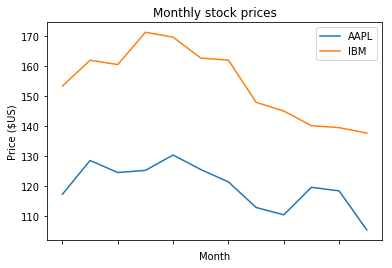

In [2]:
# Create a list of y-axis column names: y_columns
_ = y_columns = ['AAPL', 'IBM']
# Generate a line plot
df.plot(x='Month', y=y_columns)
# Add the title
plt.title('Monthly stock prices')
# Add the y-axis label
plt.ylabel('Price ($US)')
# Display the plot
plt.show()

It looks like the monthly stock prices of both AAPL and IBM peaked early in the year before falling.

## 1.2 pandas scatter plots
Pandas scatter plots are generated using the `kind='scatter'` keyword argument. Scatter plots require that the x and y columns be chosen by specifying the `x` and `y` parameters inside `.plot()`. Scatter plots also take an `s` keyword argument to provide the radius of each circle to plot in pixels.

In this exercise, you're going to plot fuel efficiency (miles-per-gallon) versus horse-power for 392 automobiles manufactured from 1970 to 1982 from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Auto+MPG).

The size of each circle is provided as a NumPy array called `sizes`. This array contains the normalized `'weight'` of each automobile in the dataset.

All necessary modules have been imported and the DataFrame is available in the workspace as `df`.

### Instructions:
* Generate a scatter plot with `'hp'` on the x-axis and `'mpg'` on the y-axis. Specify `s=sizes`.
* Add a title to the plot.
* Specify the x-axis and y-axis labels.

In [3]:
# Load DataFrame
df_auto_mpg = pd.read_csv('_datasets/auto-mpg.csv')
sizes = ((df_auto_mpg['weight']/df_auto_mpg['weight'].max()).values ** 2)*110

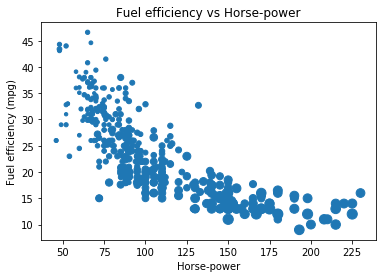

In [4]:
# Generate a scatter plot
df_auto_mpg.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

As you would expect, automobiles with higher horsepower are less fuel efficient.

## 1.3 pandas box plots
While pandas can plot multiple columns of data in a single figure, making plots that share the same x and y axes, there are cases where two columns cannot be plotted together because their units do not match. The `.plot()` method can generate subplots for each column being plotted. Here, each plot will be scaled independently.

In this exercise your job is to generate box plots for fuel efficiency (mpg) and weight from the automobiles data set. To do this in a single figure, you'll specify `subplots=True` inside `.plot()` to generate two separate plots.

All necessary modules have been imported and the automobiles dataset is available in the workspace as df.

### Instructions:
* Make a list called `cols` of the column names to be plotted: `'weight'` and `'mpg'`.
* Call plot on `df[cols]` to generate a box plot of the two columns in a single figure. To do this, specify `subplots=True`.

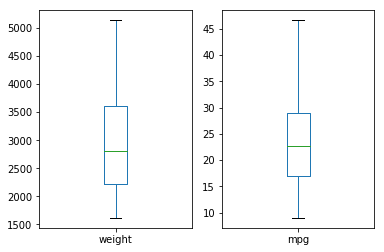

In [5]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
df_auto_mpg[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

Box plots are a great way to visualize important summary statistics.

## 1.4 pandas hist, pdf and cdf
Pandas relies on the `.hist()` method to not only generate histograms, but also plots of probability density functions (PDFs) and cumulative density functions (CDFs).

In this exercise, you will work with a dataset consisting of restaurant bills that includes the amount customers tipped.

The original dataset is provided by the [Seaborn package](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv).

Your job is to plot a PDF and CDF for the `fraction` column of the tips dataset. This column contains information about what fraction of the total bill is comprised of the tip.

Remember, when plotting the PDF, you need to specify `normed=True` in your call to `.hist()`, and when plotting the CDF, you need to specify `cumulative=True` in addition to `normed=True`.

All necessary modules have been imported and the tips dataset is available in the workspace as `df`. Also, some formatting code has been written so that the plots you generate will appear on separate rows.

### Instructions:
* Plot a PDF for the values in `fraction` with 30 `bins` between 0 and 30%. The range has been taken care of for you. `ax=axes[0]` means that this plot will appear in the first row.
* Plot a CDF for the values in `fraction` with 30 `bins` between 0 and 30%. Again, the range has been specified for you. To make the CDF appear on the second row, you need to specify `ax=axes[1]`.

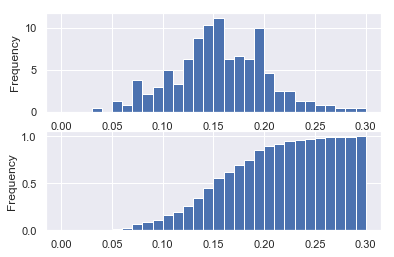

In [6]:
# Set default Seaborn style
import seaborn as sns
sns.set()

# Load DataFrame
df_tips = pd.read_csv('_datasets/tips.csv')

# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df_tips.fraction.plot(ax=axes[0], kind='hist', bins=30, density=True, range=(0,.3))

# Plot the CDF
df_tips.fraction.plot(ax=axes[1], kind='hist', bins=30, density=True, cumulative=True, range=(0,.3))
plt.show()

# 2. Statistical exploratory data analysis
## 2.1 Bachelor's degrees awarded to women
In this exercise, you will investigate statistics of the percentage of Bachelor's degrees awarded to women from 1970 to 2011. Data is recorded every year for 17 different fields. This data set was obtained from the [Digest of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp).

Your job is to compute the minimum and maximum values of the `'Engineering'` column and generate a line plot of the mean value of all 17 academic fields per year. To perform this step, you'll use the `.mean()` method with the keyword argument `axis='columns'`. This computes the mean across all columns per row.

The DataFrame has been pre-loaded for you as `df` with the index set to `'Year'`.

### Instructions:
* Print the minimum value of the `'Engineering'` column.
* Print the maximum value of the `'Engineering'` column.
* Construct the mean percentage per year with `.mean(axis='columns')`. Assign the result to `mean`.
* Plot the average percentage per year. Since `'Year'` is the index of `df`, it will appear on the x-axis of the plot. No keyword arguments are needed in your call to `.plot()`.

In [7]:
# Load dataset
df_degrees = pd.read_csv('_datasets/percent-bachelors-degrees-women-usa.csv')

0.8
19.0


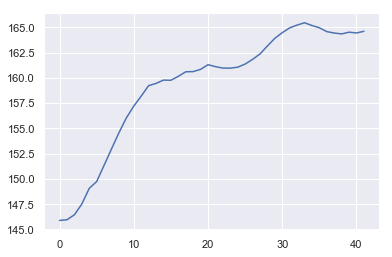

In [8]:
# Print the minimum value of the Engineering column
print(df_degrees['Engineering'].min())
# Print the maximum value of the Engineering column
print(df_degrees['Engineering'].max())

# Construct the mean percentage per year: mean
mean = df_degrees.mean(axis='columns')
# Plot the average percentage per year
mean.plot()
# Display the plot
plt.show()

It looks like there has generally been an upward trend since 1970.

## 2.2 Median vs mean
In many data sets, there can be large differences in the mean and median value due to the presence of outliers.

In this exercise, you'll investigate the mean, median, and max fare prices paid by passengers on the Titanic and generate a box plot of the fare prices. This data set was obtained from [Vanderbilt University](http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.html).

All necessary modules have been imported and the DataFrame is available in the workspace as `df`.

### Instructions:
* Print summary statistics of the `'fare'` column of `df` with `.describe()` and `print()`. Note: `df.fare` and `df['fare']` are equivalent.
* Generate a box plot of the `'fare'` column.

In [9]:
# Load dataset
df_titanic = pd.read_csv('_datasets/titanic.csv')

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64


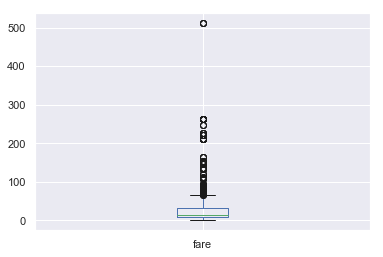

In [10]:
# Print summary statistics of the fare column with .describe()
print(df_titanic['fare'].describe())

# Generate a box plot of the fare column
df_titanic['fare'].plot(kind='box')

# Show the plot
plt.show()

Here you can see why the median is a more informative statistic in the presence of outliers.

## 2.3 Quantiles
In this exercise, you'll investigate the probabilities of life expectancy in countries around the world. This dataset contains life expectancy for persons born each year from 1800 to 2015. Since country names change or results are not reported, not every country has values. This dataset was obtained from [Gapminder](https://docs.google.com/spreadsheets/d/1dgOdlUEq6_V55OHZCxz5BG_0uoghJTeA6f83br5peNs/pub?range=A1:D70&gid=1&output=html#).

First, you will determine the number of countries reported in 2015. There are a total of 260 unique countries in the entire dataset. Then, you will compute the 5th and 95th percentiles of life expectancy over the entire dataset. Finally, you will make a box plot of life expectancy every 50 years from 1800 to 2000. Notice the large change in the distributions over this period.

The dataset has been pre-loaded into a DataFrame called `df`.

### Instructions:
* Print the number of countries reported in 2015. To do this, use the `.count()` method on the `'2015'` column of `df`.
* Print the 5th and 95th percentiles of `df`. To do this, use the `.quantile()` method with the list `[0.05, 0.95]`.
* Generate a box plot using the list of columns provided in `years`. This has already been done for you, so click on 'Submit Answer' to view the result!

In [11]:
# Load dataset
df_gapminder = pd.read_csv('_datasets/gapminder.csv')

*** Number of countries in:
* 1800:	201
* 1850:	201
* 1900:	201
* 1950:	202
* 2000:	209
* 2015:	208

*** The 5th and 95th percentiles:

      Unnamed: 0   1800   1801   1802  1803  1804   1805   1806   1807  1808  \
0.05       12.95  25.40  25.30  25.20  25.2  25.2  25.40  25.40  25.40  25.3   
0.95      246.05  37.92  37.35  38.37  38.0  38.3  38.37  38.37  38.37  38.0   

       ...      2007   2008    2009    2010   2011    2012    2013   2014  \
0.05   ...     53.07  53.60  54.235  54.935  55.97  56.335  56.705  56.87   
0.95   ...     80.73  80.93  81.200  81.365  81.60  81.665  81.830  82.00   

        2015     2016  
0.05  57.855  59.2555  
0.95  82.100  82.1650  

[2 rows x 218 columns]


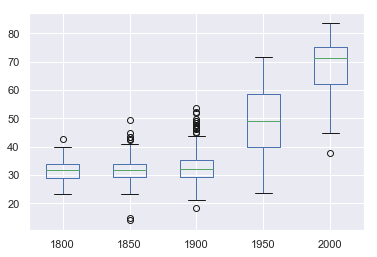

In [12]:
print('*** Number of countries in:')

# Print the number of countries reported in 1800
print('* 1800:', end='\t')
print(df_gapminder['1800'].count())

# Print the number of countries reported in 1850
print('* 1850:', end='\t')
print(df_gapminder['1850'].count())

# Print the number of countries reported in 1900
print('* 1900:', end='\t')
print(df_gapminder['1900'].count())

# Print the number of countries reported in 1950
print('* 1950:', end='\t')
print(df_gapminder['1950'].count())

# Print the number of countries reported in 2000
print('* 2000:', end='\t')
print(df_gapminder['2000'].count())

# Print the number of countries reported in 2015
print('* 2015:', end='\t')
print(df_gapminder['2015'].count())
print('')

# Print the 5th and 95th percentiles
print('*** The 5th and 95th percentiles:\n')
print(df_gapminder.quantile([0.05, 0.95]))

# Generate a box plot
years = ['1800', '1850', '1900', '1950', '2000']
df_gapminder[years].plot(kind='box')
plt.show()

It looks like overall, life expectancy has steadily increased since 1900.

# 3 Separating populations with Boolean indexing
## 3.1 Separate and summarize
Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?

In this exercise, you'll compute the means and standard deviations of all columns in the full automobile dataset. Next, you'll compute the same quantities for just the US population and subtract the global values from the US values.

### Instructions:
* Compute the global mean and global standard deviations of `df` using the `.mean()` and `.std()` methods. Assign the results to `global_mean` and `global_std`.
* Filter the `'US'` population from the `'origin'` column and assign the result to `us`.
* Compute the US mean and US standard deviations of `us` using the `.mean()` and `.std()` methods. Assign the results to `us_mean` and `us_std`.
* Print the differences between `us_mean` and `global_mean` and `us_std` and `global_std`. This has already been done for you.

In [13]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = df_auto_mpg.mean()
global_std = df_auto_mpg.std()

# Filter the US population from the origin column: us
us = df_auto_mpg[df_auto_mpg['origin'] == 'US']

# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()

# Print the differences
print(us_mean - global_mean)
print('\n')
print(us_std - global_std)

mpg        -3.412449
cyl         0.805612
displ      53.100255
hp         14.579592
weight    394.905612
accel      -0.551122
yr         -0.387755
dtype: float64


mpg       -1.364623
cyl       -0.049788
displ     -6.267657
hp         1.406630
weight   -54.055870
accel     -0.022844
yr        -0.023369
dtype: float64


Interestingly, it looks like US automobiles weigh more than the global mean.

## 3.2 Separate and plot
Population filtering can be used alongside plotting to quickly determine differences in distributions between the sub-populations. You'll work with the Titanic dataset.

There were three passenger classes on the Titanic, and passengers in each class paid a different fare price. In this exercise, you'll investigate the differences in these fare prices.

Your job is to use Boolean filtering and generate box plots of the fare prices for each of the three passenger classes. The fare prices are contained in the `'fare'` column and passenger class information is contained in the `'pclass'` column.

When you're done, notice the portions of the box plots that differ and those that are similar.

### Instructions:
* Inside `plt.subplots()`, specify the `nrows` and `ncols` parameters so that there are 3 rows and 1 column.
* Filter the rows where the `'pclass'` column has the values `1` and generate a box plot of the `'fare'` column.
* Filter the rows where the `'pclass'` column has the values `2` and generate a box plot of the `'fare'` column.
* Filter the rows where the `'pclass'` column has the values `3` and generate a box plot of the `'fare'` column.

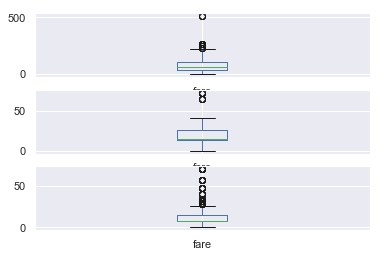

In [14]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows=3, ncols=1)

# Generate a box plot of the fare prices for the First passenger class
df_titanic.loc[df_titanic['pclass'] == 1].plot(ax=axes[0], y='fare', kind='box')
# Generate a box plot of the fare prices for the Second passenger class
df_titanic.loc[df_titanic['pclass'] == 2].plot(ax=axes[1], y='fare', kind='box')
# Generate a box plot of the fare prices for the Third passenger class
df_titanic.loc[df_titanic['pclass'] == 3].plot(ax=axes[2], y='fare', kind='box')

# Display the plot
plt.show()

Unsurprisingly, passengers in the first class had the highest fare.